# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

I acknowledge that I have used AI to the extent permitted by the UVA
AI acceptable use policy. I acknowlegde that I am aware of the possibility
of AI producing errors and offensive content and certify that I
have taken the necessary measures to ensure that the work produced is both
accurate and ethical to the best of my ability.

A link to a doc with my equations can be found here:
https://docs.google.com/document/d/1ZFWH7XI4MXAPO2FHyWhfJ2-E6sWyTZOaSpAiTHTLkPU/edit?usp=sharing



**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

heart = pd.read_csv("heart_hw.csv")

In [43]:
#3.1

control_survival = heart.loc[heart['transplant'] == 'control', 'y'].mean()

treatment_survival = heart.loc[heart['transplant'] == 'treatment', 'y'].mean()

average_treatment_effect = treatment_survival - control_survival

print(f"(a) Control group survival rate: {control_survival:.8f}")
print(f"(b) Treatment group survival rate: {treatment_survival:.8f}")
print(f"Average Treatment Effect (ATE): {average_treatment_effect:.8f}")


(a) Control group survival rate: 0.11764706
(b) Treatment group survival rate: 0.34782609
Average Treatment Effect (ATE): 0.23017903


In [31]:
#3.2
heart['transplant_dummy'] = (heart['transplant'] == 'treatment').astype(int)

X = heart[['transplant_dummy']]
y = heart['y']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficient = model.coef_[0]

print(f"Intercept (control mean): {intercept:.8f}")
print(f"Coefficient (ATE): {coefficient:.8f}")


Intercept (control mean): 0.11764706
Coefficient (ATE): 0.23017903


The constant/intercept of the regression and the coefficient on transplant are the same between the regression and my computations from part 1 because they are using the same data. The only difference is the regression arrives at these numbers using a different method. When it comes to linear regression analysis, the intercept is what yields the baseline prediction when the coefficients are 0. So, the coefficients are what change the slope of the regression as they're multiplied with the intercept. In the context of this problem, the "baseline" prediction would be the control group since they don't receive any treatment. Treatment would be the "coefficient" since it's the determining factor in what changes the slope of the regression line (ie. the rate of survival). It makes sense that the coefficient would be the same as the average treatment effect (0.23017) because, essentially, they are the same thing: the coefficient is what's influencing the transformation in the control group survival rate, or, the difference in survival rates between the control group (who don't receive a transplant) and the treatment group (those who do receive one).

In [33]:
#3.3

heart['transplant_dummy'] = (heart['transplant'] == 'treatment').astype(int)

X = heart[['transplant_dummy', 'age']]
y = heart['y']

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

intercept = model.intercept_
coef_transplant = model.coef_[0]
coef_age = model.coef_[1]

print(f"Intercept (baseline survival): {intercept:.8f}")
print(f"Coefficient on transplant (ATE, controlling for age): {coef_transplant:.8f}")
print(f"Coefficient on age: {coef_age:.8f}")



Intercept (baseline survival): 0.70195697
Coefficient on transplant (ATE, controlling for age): 0.26470169
Coefficient on age: -0.01360722


Here, the intercept increases greatly from that of part 2 where age wasn't factored into our regression. The large increase in intercept (baseline survival rate) displays how much age affected the liklihood of survival. When not accounted for, the survival rate hovered around 11.8% whereas, when age is controled, we see the survival rate hovering around 70.2%. We can now reasonably conclude that age is a significant factor in determining the survival rate as it is negatively correlated with survival (as age increases, your chances of surival decrease).

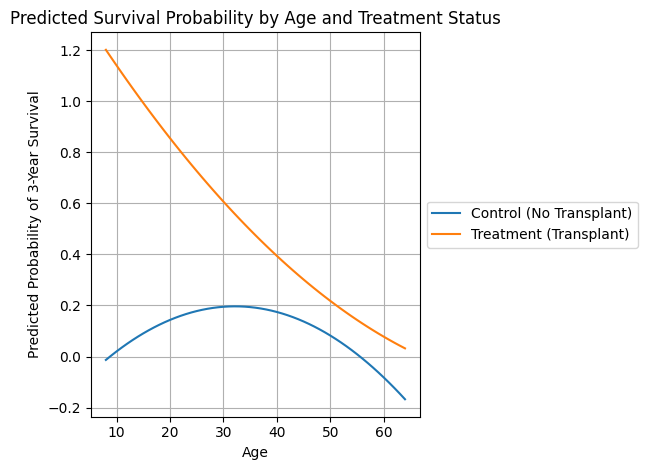

In [41]:
#3.4

heart['treatment'] = (heart['transplant'] == 'treatment').astype(int)

heart['age_squared'] = heart['age'] ** 2
heart['age_treatment'] = heart['age'] * heart['treatment']
heart['age_squared_treatment'] = heart['age_squared'] * heart['treatment']

features = ['age', 'age_squared', 'treatment', 'age_treatment', 'age_squared_treatment']
X = heart[features]
y = heart['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

ages = np.arange(int(heart['age'].min()), int(heart['age'].max()) + 1)
for treatment_status in [0, 1]:
    age_squared = ages ** 2
    age_treatment = ages * treatment_status
    age_squared_treatment = age_squared * treatment_status
    X_pred = pd.DataFrame({
        'age': ages,
        'age_squared': age_squared,
        'treatment': treatment_status,
        'age_treatment': age_treatment,
        'age_squared_treatment': age_squared_treatment
    })
    survival_pred = model.predict(X_pred)
    label = 'Treatment (Transplant)' if treatment_status == 1 else 'Control (No Transplant)'
    plt.plot(ages, survival_pred, label=label)

plt.xlabel('Age')
plt.ylabel('Predicted Probability of 3-Year Survival')
plt.title('Predicted Survival Probability by Age and Treatment Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


The graph of the regression model shows us, on the simplest level, that receiving a transplant is the optimal route to take to optimize chances of survival. We know this because the regression lines for the contrl and treatment groups never intersect, meaning that the chances for survival are always higher when treatment is received, regardless of age.

With that said, there is relatively linear negative correlation between age and survival within the treatment group. As age increases, survival chances decrease. Curiously, in the control group, the regression curve is more parabolic, showing that there is an optimal age (maximum) for survival if no treatment is received (~32 years of age).

The key insight lies however in the difference in survival rates between control and treatment groups between the ages of 0 to roughly this 32 years age marker. The earlier you receive a transplant, the greater your survival chances will be relative to the survival chances of the control group before the age of ~32. But oddly enough, the chances go up between 0 and ~32 when in the control group but go down in the treatment group in this same window. The only difference is that the treatment group's odds are much higher, despite the fact that they decrease with age (when the control group's odds increase with age before ~32).

# 3.5


Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?


Were they to suggest this, I would be most concerned about how they award "points" and score potential candidates. As we've discussed, we see that there is only a marginal increase in surival odds after the age of 32. Beyond that point, the survival odds go down together at a constant rate as age increases.

It seems to me that higher scores (highest priority organ recipients) should be given to patients who have the greatest increase in odds of survival  if given a transplant. As our model shows us, those people woud be the younger people. They would be scored more highly since the younger they are, the greater the difference in their survival rate (ie. the greatest gaps between the control survival line and treatment survival line).

Now, while our algorithm is helpful in determining how age affects chances of survival between treatment and no treatment, it fails to take into consideration of a plethora of other factors which all may contribute to the chances of survival. For instance, although we might award a 10 yeard old the highest score according to our model factoring in age into survival chances, the chances may be even higher for a 55 year old if we take into account that the 55 year old has an underlying heart condition that would almost certainly result in death if he's not